In [1]:
import pandas as pd
import pickle

df = pd.read_csv('ipl.csv')

In [2]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
# Data Cleaning
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [4]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [5]:
#keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings','Rajasthan Royals','Mumbai Indians','Kings XI Punjab', 'Royal Challengers Bangalore','Delhi Daredevils','Sunrisers Hyderabad']

In [6]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [7]:
#removing the first 5 overs data from every match
df = df[df['overs']>=5.0]

In [8]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [9]:
#converting date from string to datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [10]:
# data Processing
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [11]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [12]:
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [13]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [14]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [15]:
encoded_df

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.1,61,0,59,0,222
33,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.2,61,1,59,1,222
34,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.3,61,1,59,1,222
35,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.4,61,1,59,1,222
36,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.5,61,1,58,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.1,106,9,29,4,107
75885,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.2,107,9,29,4,107
75886,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.3,107,9,28,4,107
75887,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.4,107,9,24,4,107


In [16]:
#removing date col
X_train.drop(labels='date', axis=True,inplace=True)
X_test.drop(labels='date', axis=True,inplace=True)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
# Creating a pickle file
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor,open(filename, 'wb'))

## Ridge Regression

In [19]:
from sklearn.linear_model  import Ridge
from sklearn.model_selection import GridSearchCV

In [20]:
ridge= Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\salon\downloads\env\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.36893e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\salon\downloads\env\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.40015e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\salon\downloads\env\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.35766e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\salon\downloads\env\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.52625e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\salon\downloads\env\lib\site-packages\sklearn\linea

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [21]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.4152792487925


In [22]:
prediction=ridge_regressor.predict(X_test)

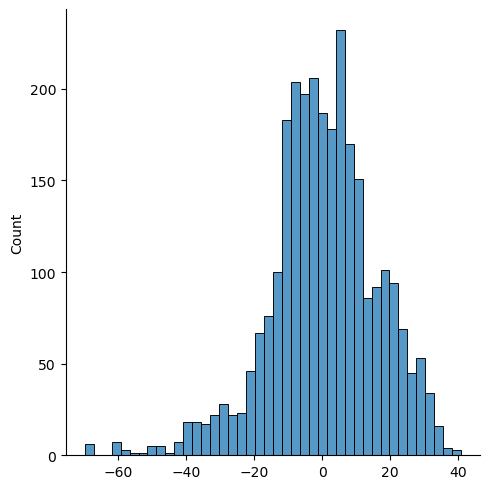

In [23]:
import seaborn as sns
sns.displot(y_test-prediction)

In [24]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 12.117294527005017
MSE: 251.0317296411275
RMSE: 15.843980864704662


## Lasso Regression

In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [26]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\salon\downloads\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.522e+06, tolerance: 2.530e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\salon\downloads\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.429e+06, tolerance: 2.547e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\salon\downloads\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.635e+

{'alpha': 1}
-320.82637898585256


In [27]:
prediction=lasso_regressor.predict(X_test)

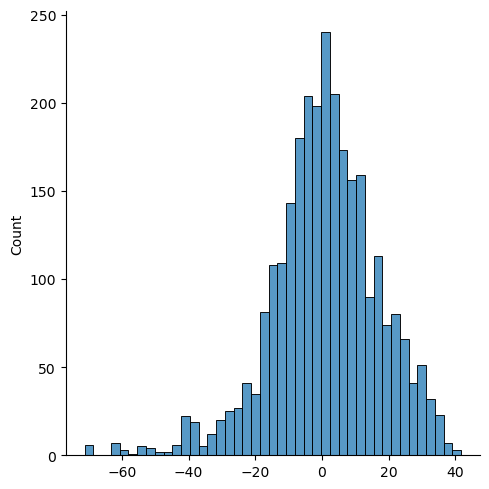

In [28]:
import seaborn as sns
sns.displot(y_test-prediction)

In [29]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.214053814850248
MSE: 262.37973664007154
RMSE: 16.198139912967523


In [30]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [34]:
models = dict()

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
# Evaluate Model
train_score_forest = str(forest.score(X_train,y_train)*100)
test_score_forest = str(forest.score(X_test,y_test)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] =test_score_forest

Train Score : 99.24%
Test Score : 67.18%


In [37]:
print("---- Random Forest Regression - Model evaluation----")
print("Mean absolute error (MAE): {}".format(mae(y_test, forest.predict(X_test))))
print("Mean Squared Error (MSE):{}".format(mse(y_test, forest.predict(X_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, forest.predict(X_test)))))

---- Random Forest Regression - Model evaluation----


NameError: name 'mae' is not defined

## Predictions 

In [48]:
def score_predict(bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5, model=forest):
    prediction_array = []
    #batting team
    if bat_team == 'Chennai Super Kings':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
    elif bat_team == 'Delhi Daredevils':
            prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
    elif bat_team == 'Kings XI Punjab':
            prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
    elif bat_team == 'Kolkata Knight Riders':
            prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
    elif bat_team == 'Mumbai Indians':
            prediction_array = prediction_array + [0,0,0,0,1,0,0,0,]
    elif bat_team == 'Rajasthan Royals':
            prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
    elif bat_team == 'Royal Challengers Bangalore':
            prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
    elif bat_team == 'Sunrisers Hyderabad':
            prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
        #bowling team
    if bowl_team =='Chennai Super Kings':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
    elif bowl_team == 'Delhi Daredevils':
            prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
    elif bowl_team == 'Kings XI Punjab':
            prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
    elif bowl_team == 'Kolkata Knight Riders':
            prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
    elif bowl_team == 'Mumbai Indians':
            prediction_array = prediction_array + [0,0,0,0,1,0,0,0,]
    elif bowl_team == 'Rajasthan Royals':
            prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
    elif bowl_team == 'Royal Challengers Bangalore':
            prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
    elif bowl_team == 'Sunrisers Hyderabad':
            prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
            
    prediction_array = prediction_array + [runs,wickets,overs,runs_last_5,wickets_last_5]
    prediction_array = np.array([prediction_array])
    pred = model.predict(prediction_array)
    return int(round(pred[0]))
        

In [51]:
bat_team='Delhi Daredevils'
bowl_team='Chennai Super Kings'
score = score_predict(bat_team, bowl_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 95')

Predicted Score : 76 || Actual Score : 95


C:\Users\salon\downloads\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
